In [ ]:
# Import the necassary packages
!pip install tzdata
!pip install transformers torch
!pip install funcy
!pip install --no-deps pyLDAvis

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import cross_val_score
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models
from IPython.display import IFrame
import gensim
from gensim import corpora
import pyLDAvis
import multiprocessing
import torch
from transformers import pipeline
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.ts

True

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/eng_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         7102 non-null   int64 
 1   sentiment  7102 non-null   object
 2   content    7102 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of          ID sentiment                                            content
0     10941     anger  At the point today where if someone says somet...
1     10942     anger  @CorningFootball  IT'S GAME DAY!!!!      T MIN...
2     10943     anger  This game has pissed me off more than any othe...
3     10944     anger  @spamvicious I've just found out it's Candice ...
4     10945     anger  @moocowward @mrsajhargreaves @Melly77 @GaryBar...
...     ...       ...                                                ...
7097  40781   sadness  @VivienLloyd Thank you so much! Just home - st...
7098  40782   sadness              Just put the winter duvet on ☃️❄️🌬☔️ 
7099  40783   sadness  @SilkInSide @TommyJoeRatliff that's so pretty!...
7100  40784   sadness  @BluesfestByron second artist announcement loo...
7101  40785   sadness  I can literally eat creamy pesto pasta topped ...

[7102 rows x 3 columns]>

In [ ]:
# renaming column name and checking for the null values

df['Emotion']=df['sentiment']
df['Text']=df['content']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dropping the column
df.drop(columns=['content','sentiment'],inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


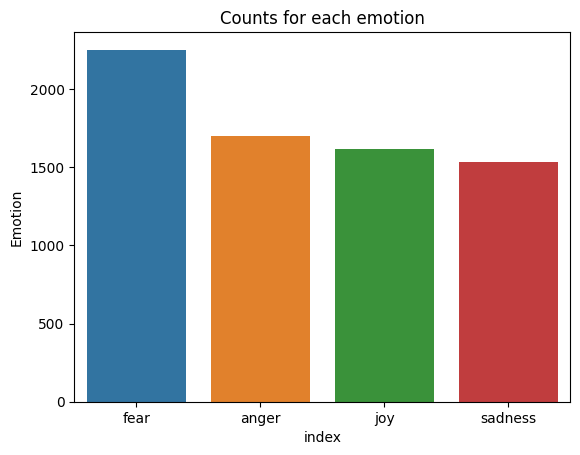

In [ ]:
#Emotion distribution

emotion_count = df['Emotion'].value_counts().reset_index()

sns.barplot(data=emotion_count,x='index',y='Emotion')
plt.title("Counts for each emotion")
plt.show()

In [ ]:
# Text preprocessing
def preprocess_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()


    text = re.sub(r'\W', ' ', text)

    text = ''.join([char for char in text if char not in string.punctuation])

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens


df['Tokenized_Text'] = df['Text'].apply(preprocess_and_tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df)

         ID  Emotion                                               Text  \
0     10941    anger  At the point today where if someone says somet...   
1     10942    anger  @CorningFootball  IT'S GAME DAY!!!!      T MIN...   
2     10943    anger  This game has pissed me off more than any othe...   
3     10944    anger  @spamvicious I've just found out it's Candice ...   
4     10945    anger  @moocowward @mrsajhargreaves @Melly77 @GaryBar...   
...     ...      ...                                                ...   
7097  40781  sadness  @VivienLloyd Thank you so much! Just home - st...   
7098  40782  sadness              Just put the winter duvet on ☃️❄️🌬☔️    
7099  40783  sadness  @SilkInSide @TommyJoeRatliff that's so pretty!...   
7100  40784  sadness  @BluesfestByron second artist announcement loo...   
7101  40785  sadness  I can literally eat creamy pesto pasta topped ...   

                                         Tokenized_Text  
0     [point, today, someon, say, someth,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_lengths = [max(len(tokens) for tokens in text) for text in df['Tokenized_Text']]
print(max(max_lengths))

49


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy Naive Bayes: 0.788881069669247
Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.79      0.82       375
        fear       0.71      0.91      0.80       434
         joy       0.89      0.79      0.84       319
     sadness       0.76      0.61      0.68       293

    accuracy                           0.79      1421
   macro avg       0.80      0.77      0.78      1421
weighted avg       0.80      0.79      0.79      1421



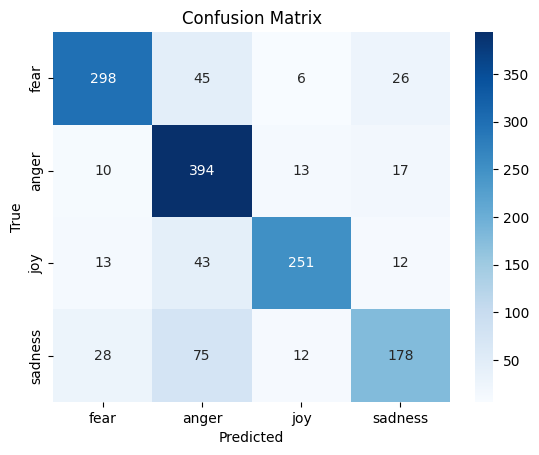

In [ ]:
# Text to numerical data :
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Tokenized_Text'].apply(lambda x: ' '.join(x)))

y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

curAlpha = 0.32
NBClassifier = MultinomialNB(alpha=curAlpha)
NBClassifier.fit(X_train, y_train)

myPredTest = NBClassifier.predict(X_test)

accuracy = np.sum(myPredTest == y_test) / len(y_test)
print(f'Accuracy Naive Bayes: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, myPredTest))

conf_matrix = confusion_matrix(y_test, myPredTest)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_count['index'], yticklabels=emotion_count['index'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Cross validation for Naivebayes
cv_scores = cross_val_score(NBClassifier, X_test, y_test, cv=5)

print("Cross-Validation Scores:", cv_scores)

average_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.63859649 0.66197183 0.67253521 0.71126761 0.6584507 ]
Average Cross-Validation Score: 0.6685643686681493


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy SVM: 0.8761435608726249
Classification Report:
              precision    recall  f1-score   support

       anger       0.93      0.84      0.89       375
        fear       0.79      0.96      0.87       434
         joy       0.96      0.91      0.93       319
     sadness       0.87      0.77      0.82       293

    accuracy                           0.88      1421
   macro avg       0.89      0.87      0.88      1421
weighted avg       0.88      0.88      0.88      1421



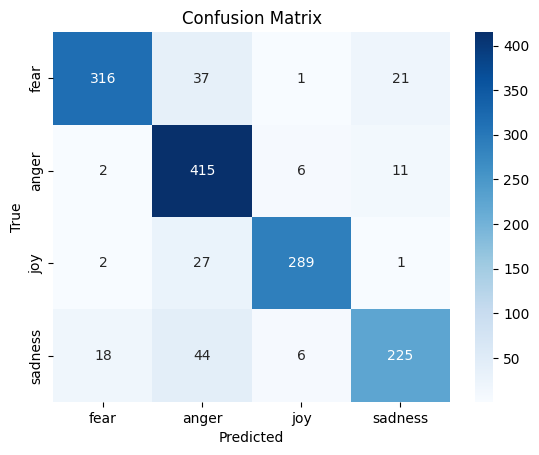

In [ ]:
import pickle
# Support vector Machine

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Tokenized_Text'].apply(lambda x: ' '.join(x)))

with open("vector.pkl",'wb') as vect:
  pickle.dump(tfidf_vectorizer,vect)


y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

with open("model.pkl",'wb') as model:
  pickle.dump(svm_classifier,model)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy SVM: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_count['index'], yticklabels=emotion_count['index'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Cross validation for svm
cv_scores = cross_val_score(svm_classifier, X_test, y_test, cv=5)

print("Cross-Validation Scores:", cv_scores)

average_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score:", average_cv_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-Validation Scores: [0.58596491 0.61971831 0.6056338  0.6443662  0.59859155]
Average Cross-Validation Score: 0.6108549542871262


In [ ]:
curAlpha = 0.32
NBClassifier = MultinomialNB(alpha=curAlpha)
NBClassifier.fit(X_train, y_train)

def preprocess_and_tokenize_input(text):
    # Convert to lowercase
    text = text.lower()

    # Remove emojis
    text = re.sub(r'\W', ' ', text)

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

random_input = "The wicked woman heaved in the evening, the seven dwarfs came home, but how shocked they were seven dwarfs1 then he and said beware of your stepmother. All rolled and all before."


preprocessed_input = preprocess_and_tokenize_input(random_input)


input_vectorized = tfidf_vectorizer.transform([preprocessed_input])

predicted_emotion_naive_bayes = NBClassifier.predict(input_vectorized)[0]
predicted_emotion_svm = svm_classifier.predict(input_vectorized)[0]

print(f"Predicted Emotion(Naivebayes): {predicted_emotion_naive_bayes}")
print(f"Predicted Emotion(SVM): {predicted_emotion_svm}")


Predicted Emotion(Naivebayes): fear
Predicted Emotion(SVM): fear


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentiment_analysis = pipeline("sentiment-analysis")

# input
random_input = "The wicked woman heaved in the evening, the seven dwarfs came home, but how shocked they were seven dwarfs1 then he and said beware of your stepmother. All rolled and all before."

# pre-trained model to predict sentiment
result = sentiment_analysis(random_input)

# predicted label and score
predicted_label = result[0]['label']
predicted_score = result[0]['score']

print(f"Predicted Sentiment: {predicted_label} with confidence: {predicted_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Predicted Sentiment: NEGATIVE with confidence: 0.9904654026031494


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Read the data
df = pd.read_excel('/content/drive/MyDrive/Papers- Abstract.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create a function for preprocessing the text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    return tokens

# Apply the preprocess function
df['Preprocessed_Abstract'] = df['ABSTRACT'].apply(preprocess_text)

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(df['Preprocessed_Abstract'])

# Create a bag of words from the dictionary
bow_corpus = [dictionary.doc2bow(tokens) for tokens in df['Preprocessed_Abstract']]

# Train the LDA model
num_topics = 5
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the top words for each topic
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print("Topic: {} \nWords: {}".format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.023*"emotion" + 0.021*"recognition" + 0.019*"feature" + 0.017*"facial" + 0.016*"expression" + 0.012*"method" + 0.009*"used" + 0.008*"proposed" + 0.008*"paper" + 0.007*"result"
Topic: 1 
Words: 0.018*"emotion" + 0.011*"learning" + 0.010*"algorithm" + 0.010*"model" + 0.008*"cognitive" + 0.008*"task" + 0.008*"detection" + 0.007*"student" + 0.007*"computational" + 0.006*"framework"
Topic: 2 
Words: 0.014*"emotion" + 0.012*"ASD" + 0.011*"model" + 0.011*"learning" + 0.010*"accuracy" + 0.010*"study" + 0.009*"FER" + 0.008*"using" + 0.006*"dataset" + 0.006*"facial"
Topic: 3 
Words: 0.019*"emotion" + 0.010*"learning" + 0.010*"emotional" + 0.009*"intelligence" + 0.009*"network" + 0.008*"feature" + 0.008*"research" + 0.007*"detection" + 0.007*"text" + 0.006*"using"
Topic: 4 
Words: 0.028*"emotion" + 0.018*"text" + 0.016*"analysis" + 0.012*"detection" + 0.010*"sentiment" + 0.008*"model" + 0.008*"data" + 0.007*"approach" + 0.007*"Emotion" + 0.007*"emotional"


In [ ]:
from IPython.display import display

def visualize_topics(lda, corpus, diction):
    # Visualize the topics
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda, corpus, diction)
    display(pyLDAvis.display(vis))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
visualize_topics(lda_model, bow_corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def generate_text(prompt, model_name="gpt2"):
    # Load pretrained GPT-2 model and tokenizer
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)

    # Tokenize input prompt
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    # Generate text
    output = model.generate(input_ids, max_length=25, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)

    # Decode the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text

# Example usage
prompt = "i lost the match"
generated_story = generate_text(prompt)
print(generated_story)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


i lost the match.

"I'm not sure if I'm going to be able to play again," he said
